# Aplicação 2: IDHM dos municípios brasileiros - Parte I

Esse projeto faz parte de um exercício proposto pelo curso de analytics da [Preditiva AI](https://www.preditiva.ai/).

Essa aplicação faz parte do módulo 2 sobre resumo de dados.

O objetivo aqui é fazer análises exploratórias básicas para entender o comportamento dos municípios brasileiros em relação a indicadores sociais e econômicos.

## Dataframe e Tratamentos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np

In [2]:
df_principal = pd.read_excel("brazil_cities.xlsx", header=3)

In [3]:
df_principal.head()

,Município,Estado,IBGE_1-4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P
0,São Paulo,SP,514794.0,0.805,0.843,0.725,57071.43,16030.0
1,Osasco,SP,32305.0,0.780,0.776,0.718,106841.78,527.0
2,Rio De Janeiro,RJ,235380.0,0.799,0.840,0.719,50690.82,6744.0
3,Brasília,DF,143641.0,0.820,0.863,0.742,79099.77,3043.0
4,Porto Alegre,RS,58369.0,0.805,0.867,0.702,49577.53,2217.0


In [115]:
df_join_estado =(pd
                 .read_excel("brazil_cities.xlsx",sheet_name= "De-Para_Estado_Regiao", header = 1)
                 .drop(columns = "Unnamed: 0")
                 )

In [116]:
df_join_estado.head()

,Estado,Região
0,AC,Norte
1,AL,Nordeste
2,AM,Norte
3,AP,Norte
4,BA,Nordeste


In [117]:
df_final = df_principal.merge(df_join_estado, on = "Estado", how = "left")

In [118]:
df_final.head()

,Município,Estado,IBGE_1-4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P,Região
0,São Paulo,SP,514794.0,0.805,0.843,0.725,57071.43,16030.0,Sudeste
1,Osasco,SP,32305.0,0.780,0.776,0.718,106841.78,527.0,Sudeste
2,Rio De Janeiro,RJ,235380.0,0.799,0.840,0.719,50690.82,6744.0,Sudeste
3,Brasília,DF,143641.0,0.820,0.863,0.742,79099.77,3043.0,Centro-Oeste
4,Porto Alegre,RS,58369.0,0.805,0.867,0.702,49577.53,2217.0,Sul


In [119]:
df_final["municipio_deduplicado"] = df_final["Município"] + "-" + df_final["Estado"]

In [120]:
df_final.head()

,Município,Estado,IBGE_1-4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P,Região,municipio_deduplicado
0,São Paulo,SP,514794.0,0.805,0.843,0.725,57071.43,16030.0,Sudeste,São Paulo-SP
1,Osasco,SP,32305.0,0.780,0.776,0.718,106841.78,527.0,Sudeste,Osasco-SP
2,Rio De Janeiro,RJ,235380.0,0.799,0.840,0.719,50690.82,6744.0,Sudeste,Rio De Janeiro-RJ
3,Brasília,DF,143641.0,0.820,0.863,0.742,79099.77,3043.0,Centro-Oeste,Brasília-DF
4,Porto Alegre,RS,58369.0,0.805,0.867,0.702,49577.53,2217.0,Sul,Porto Alegre-RS


In [121]:
df_final["municipio_deduplicado"].duplicated().value_counts()

municipio_deduplicado
False    5573
True        3
Name: count, dtype: int64

In [122]:
df_final.loc[df_final["municipio_deduplicado"] == "Assis-SP"]

,Município,Estado,IBGE_1-4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P,Região,municipio_deduplicado
152,Assis,SP,4394.0,0.805,0.771,0.781,27921.64,96.0,Sudeste,Assis-SP
153,Assis,SP,4394.0,0.805,0.771,0.781,27921.64,96.0,Sudeste,Assis-SP


In [123]:
df_final = df_final.drop_duplicates()

In [124]:
df_final["municipio_deduplicado"].duplicated().value_counts()

municipio_deduplicado
False    5573
Name: count, dtype: int64

## Panorama geral

- Qual seria o valor que separaria os 25% dos municípios com IDHM mais baixos?

<Axes: >

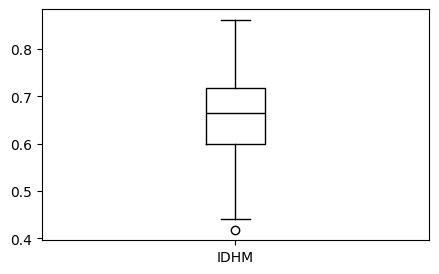

In [28]:
figure(figsize=(5, 3))
df_final["IDHM"].plot.box(color = "black")

- De acordo com o boxplot, o valor seria aproximadamente 0.6 (q1). 

- O gráfico ainda mostra que há alguns outliers com um IDHM bem baixo mas não parece existir outliers para valores de IDHM muito altos. Interessante perceber que 75% dos municípios ficam ali em torno de um IDHM de 0.7 e que a mediana tende a ser 0.65. 

- Considerando esses municípios com menor IDHM, há uma concentração em algum estado ou distrito?



In [70]:
df_concentracao_idhm = (df_final[["municipio_deduplicado", "Estado", "IDHM", "Região"]]
                        .dropna()
                        )

In [71]:
df_concentracao_idhm["IDHM_quantiles"] = pd.qcut(df_concentracao_idhm.IDHM, 4, labels = ("Q1", "Q2", "Q3", "Q4"))

In [72]:
df_concentracao_idhm.head()

,municipio_deduplicado,Estado,IDHM,Região,IDHM_quantiles
0,São Paulo-SP,SP,0.805,Sudeste,Q4
1,Osasco-SP,SP,0.780,Sudeste,Q4
2,Rio De Janeiro-RJ,RJ,0.799,Sudeste,Q4
3,Brasília-DF,DF,0.820,Centro-Oeste,Q4
4,Porto Alegre-RS,RS,0.805,Sul,Q4


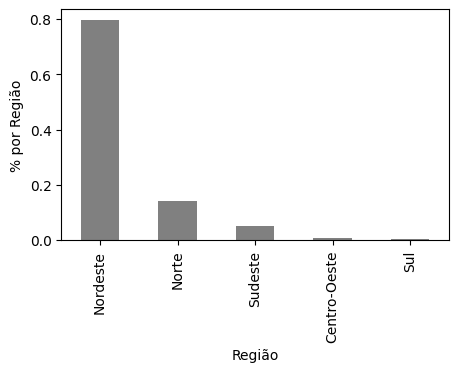

In [132]:
figure(figsize=(5, 3))
(df_concentracao_idhm.loc[df_concentracao_idhm.IDHM_quantiles == "Q1"]
 .value_counts("Região", normalize=True)
 .plot.bar(color = "gray"))
plt.ylabel("% por Região");

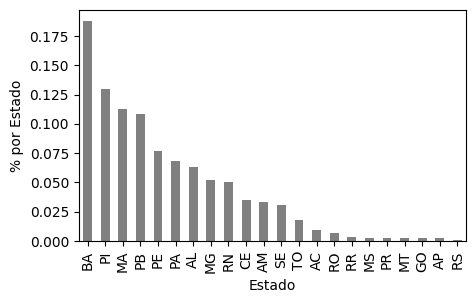

In [140]:
figure(figsize=(5, 3))
(df_concentracao_idhm.loc[df_concentracao_idhm.IDHM_quantiles == "Q1"]
 .value_counts("Estado", normalize=True)
 .plot.bar(color = "gray"))
plt.ylabel("% por Estado");

- A ONU classifica os países seguindo o seguinte intervalo para o valor de IDH:
  + < 0,550: Baixo
  + 0,550 - 0,699: Médio
  + 0,700 - 0,799: Alto
  + Maior ou igual 0,800: Muito Alto

Replicando essa classificação ao IDHM dos municípios, qual seria a sua análise da situação atual do Brasil e cada região?

In [74]:
df_concentracao_idhm_class = (df_final[["municipio_deduplicado", "Estado", "IDHM", "Região"]]
                        .dropna()
                        )

In [75]:
df_concentracao_idhm_class["ONU_Classif"] = pd.cut(df_concentracao_idhm_class.IDHM, bins = [0, 0.550, 0.699, 0.799, 1],
                                      right = False,
                                      labels = ["Baixo", "Médio", "Alto", "Muito Alto"])

In [145]:
df_classif_onu = pd.DataFrame(
    df_concentracao_idhm_class.groupby(by = ["Região", "ONU_Classif"], observed = True)["ONU_Classif"].count().reset_index(name = "freq"))

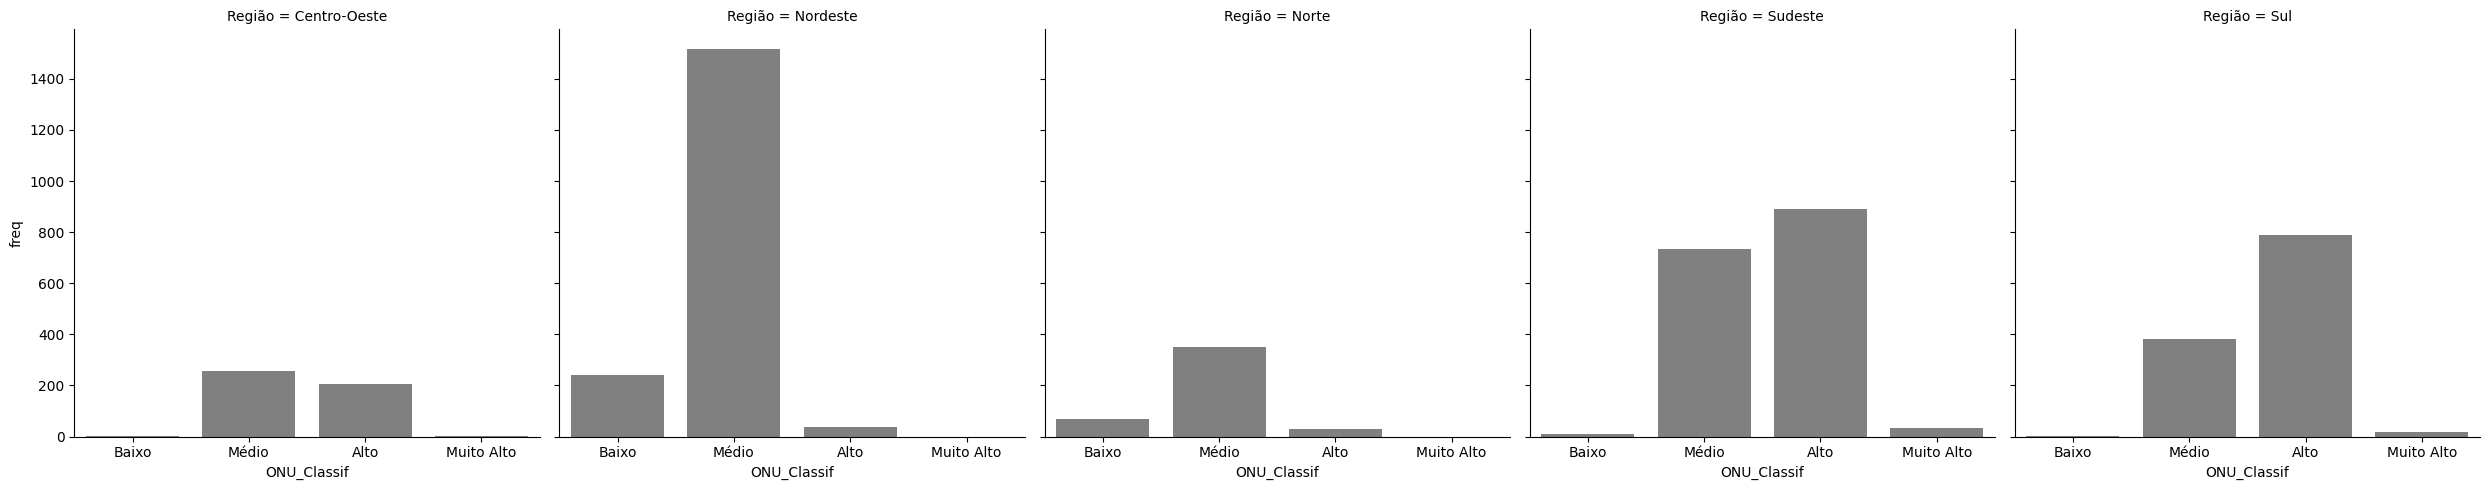

In [144]:
sns.catplot(x = "ONU_Classif", y = "freq", col = "Região", kind = "bar", data = df_classif_onu, col_wrap = 5, color = "gray");

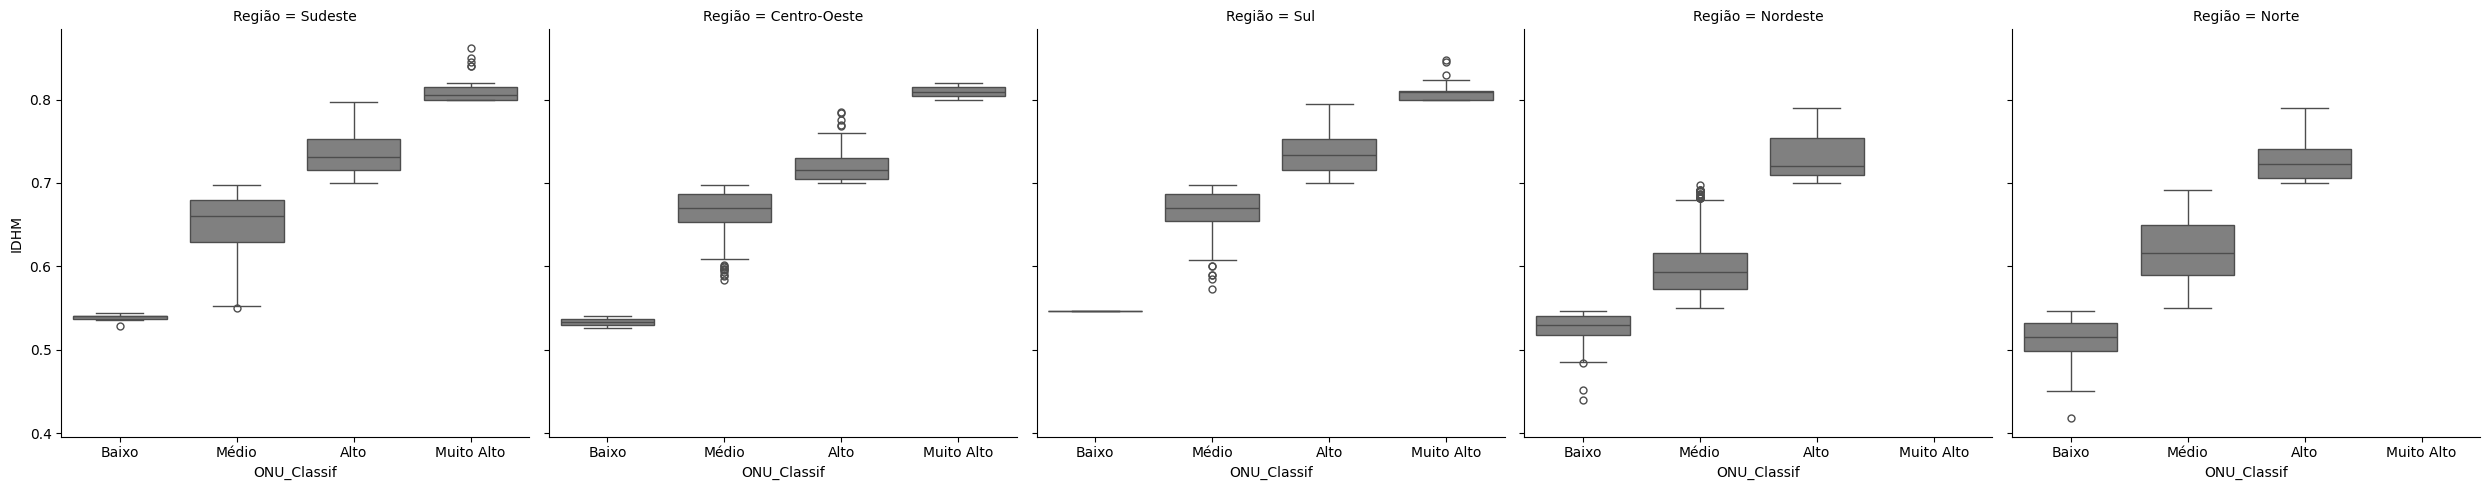

In [146]:
sns.catplot(data = df_concentracao_idhm_class, col = "Região", y = "IDHM",  kind = "box", x = "ONU_Classif", color = "gray");

## Educação Infantil

- d) Construa um boxplot da variável IDHM_Educacao por região: NO, NE, SE, S e CO. Comente as diferenças e semelhanças entre os gráficos.


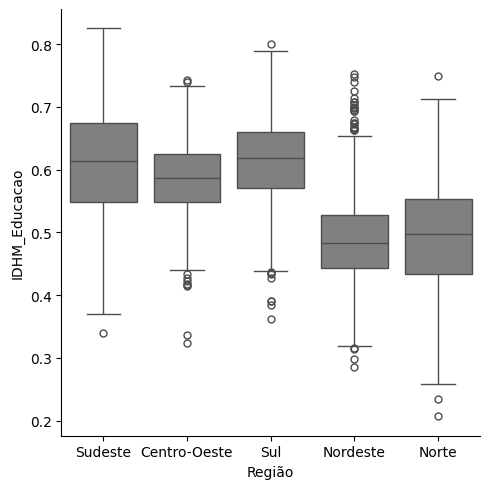

In [79]:
sns.catplot(data = df_final, y = "IDHM_Educacao", x = "Região", kind = "box", orient = "v", color = "gray");

- Em termos de semelhanças e diferenças, podemos destacar a existência de outliers em todos os casos - uns mais que outros. Se desconsideramos os outliers, podemos perceber que a região nordeste é realmente a que possui um IDHM educacional menor. Por exemplo, 75% das cidades dessa região possui um IDHM de até 0,55. Ao passo que, no caso do Sul, por exemplo, esse valor do limite superior do nordeste acaba sendo basicamente o primeiro quartil. Ao julgar pelas medianas, podemos dizer que Sul, Sudeste e Centro-oeste possuem uma similaridade bem maior entre si do que Norte e Nordeste que acabam sendo regiões mais próximas uma da outra.

- e) Para a região com a menor média da variável IDHM_Educacao, vamos priorizar os municípios com mais crianças. Dessa forma, identifique os municípios que estão acima do 3º quartil nacional em relação a quantidade de crianças com idade entre 1 e 4 anos (variável IBGE_1-4).


In [152]:
df_IDHMeducacao = df_final[["Região", "Estado", "municipio_deduplicado", "IDHM_Educacao", "IBGE_1-4"]].dropna()

In [153]:
df_IDHMeducacao = df_IDHMeducacao.loc[df_IDHMeducacao["Região"] == "Nordeste"]

In [154]:
df_IDHMeducacao = df_IDHMeducacao.rename(columns = {'IBGE_1-4': 'IBGE_1_4'})

In [155]:
df_IDHMeducacao["quantiles"] = pd.cut(df_IDHMeducacao.IBGE_1_4, 4, labels = ["q1", "q2", "q3", "q4"])

In [156]:
df_IDHMeducacao.query("quantiles == 'q3' or quantiles == 'q4'")

,Região,Estado,municipio_deduplicado,IDHM_Educacao,IBGE_1_4,quantiles
10,Nordeste,BA,Salvador-BA,0.679,91470.0,q3
15,Nordeste,CE,Fortaleza-CE,0.695,129766.0,q4


- f) Identifique também os municípios que estão no 1º quartil nacional em relação a quantidade de empresas de educação (variável COMP_P). Dessa forma, vamos priorizar os municípios com poucas empresas do setor educacional.

In [84]:
df_IDHMeducacao = df_final[["Região", "Estado", "municipio_deduplicado", "IDHM_Educacao", "COMP_P"]].dropna()

In [85]:
df_IDHMeducacao["quantiles"] = pd.cut(df_IDHMeducacao.COMP_P, 4, labels = ["q1", "q2", "q3", "q4"])

In [86]:
df_IDHMeducacao.query("quantiles == 'q1'")

,Região,Estado,municipio_deduplicado,IDHM_Educacao,COMP_P,quantiles
1,Sudeste,SP,Osasco-SP,0.718,527.0,q1
3,Centro-Oeste,DF,Brasília-DF,0.742,3043.0,q1
4,Sul,RS,Porto Alegre-RS,0.702,2217.0,q1
5,Sudeste,MG,Belo Horizonte-MG,0.737,3325.0,q1
6,Sudeste,SP,Barueri-SP,0.708,322.0,q1
...,...,...,...,...,...,...
5568,Nordeste,PI,Floresta Do Piauí-PI,0.391,1.0,q1
5569,Nordeste,RN,João Dias-RN,0.390,1.0,q1
5570,Centro-Oeste,MT,Araguainha-MT,0.627,1.0,q1
5571,Nordeste,PI,Lagoinha Do Piauí-PI,0.488,0.0,q1


<Axes: >

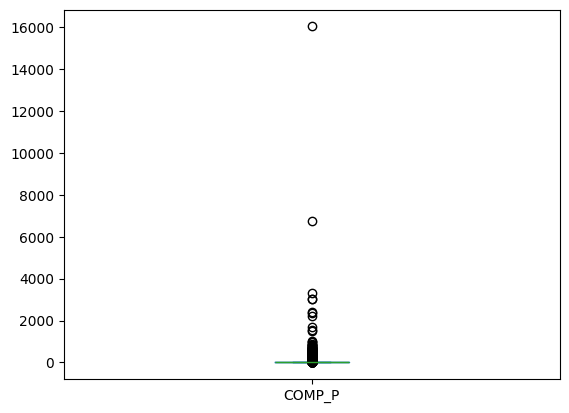

In [87]:
df_IDHMeducacao.COMP_P.plot.box()

## Proposta de Investimento

Pelo visto a partir das análises exploratórias, fica muito claro que algumas regiões brasileiras precisam de prioridade de investimento.
A região nordeste responde sozinha por praticamente 80% dos municípios brasileiros com as menores taxas de IDH.
Quanto ao nível de escolaridade, as regiões norte e nordeste são as mais carentes. 
Desse modo, não se pode negligenciar a importância de políticas públicas voltadas especificamente para essas duas regiões. O Nordeste e o Norte aqui chama a atenção como lugar que deve ser colocado em primeira ordem de investimento.